In [1]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/ROHITH KUMAR/Desktop/Innomatics Projects/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 11)

<AxesSubplot:>

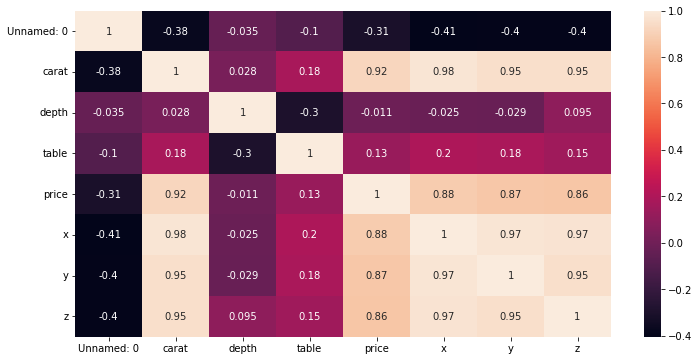

In [4]:
data.corr()
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(), annot = True)

### Drop the column “Unnamed: 0”, which is unnecessary

In [5]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


1. Observed that the minimum value of x (length), y(width) & z(depth) is zero 
    and It doesn’t make any sense to have length\width\depth of a diamond to be zero.

2. Let’s drop these rows

In [8]:
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.shape

(53920, 10)

In [9]:
#Just to confirm that there won't be any zero values rows
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Observed that the minimum values of x,y&z are non-zero values

#### Plot the distributions of numerical attributes by using hist() method

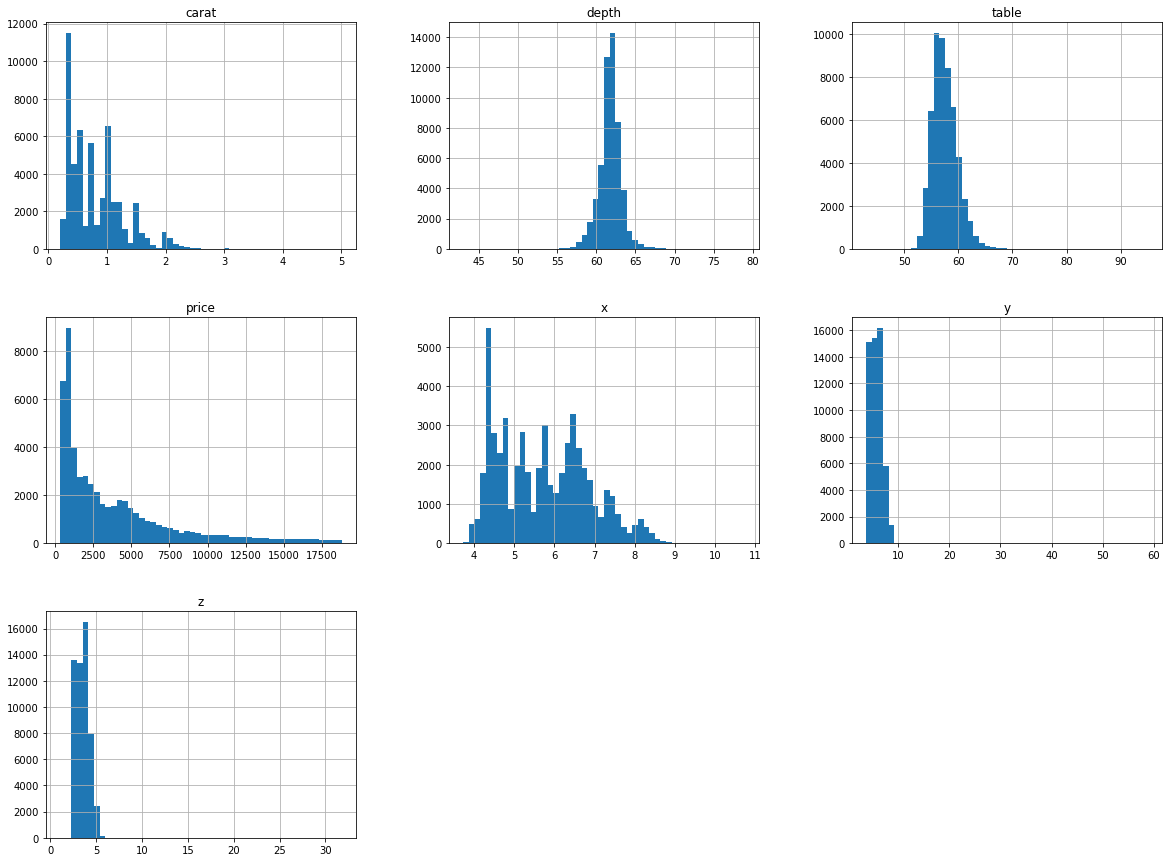

In [10]:

data.hist(bins=50,figsize=(20,15))
plt.show()


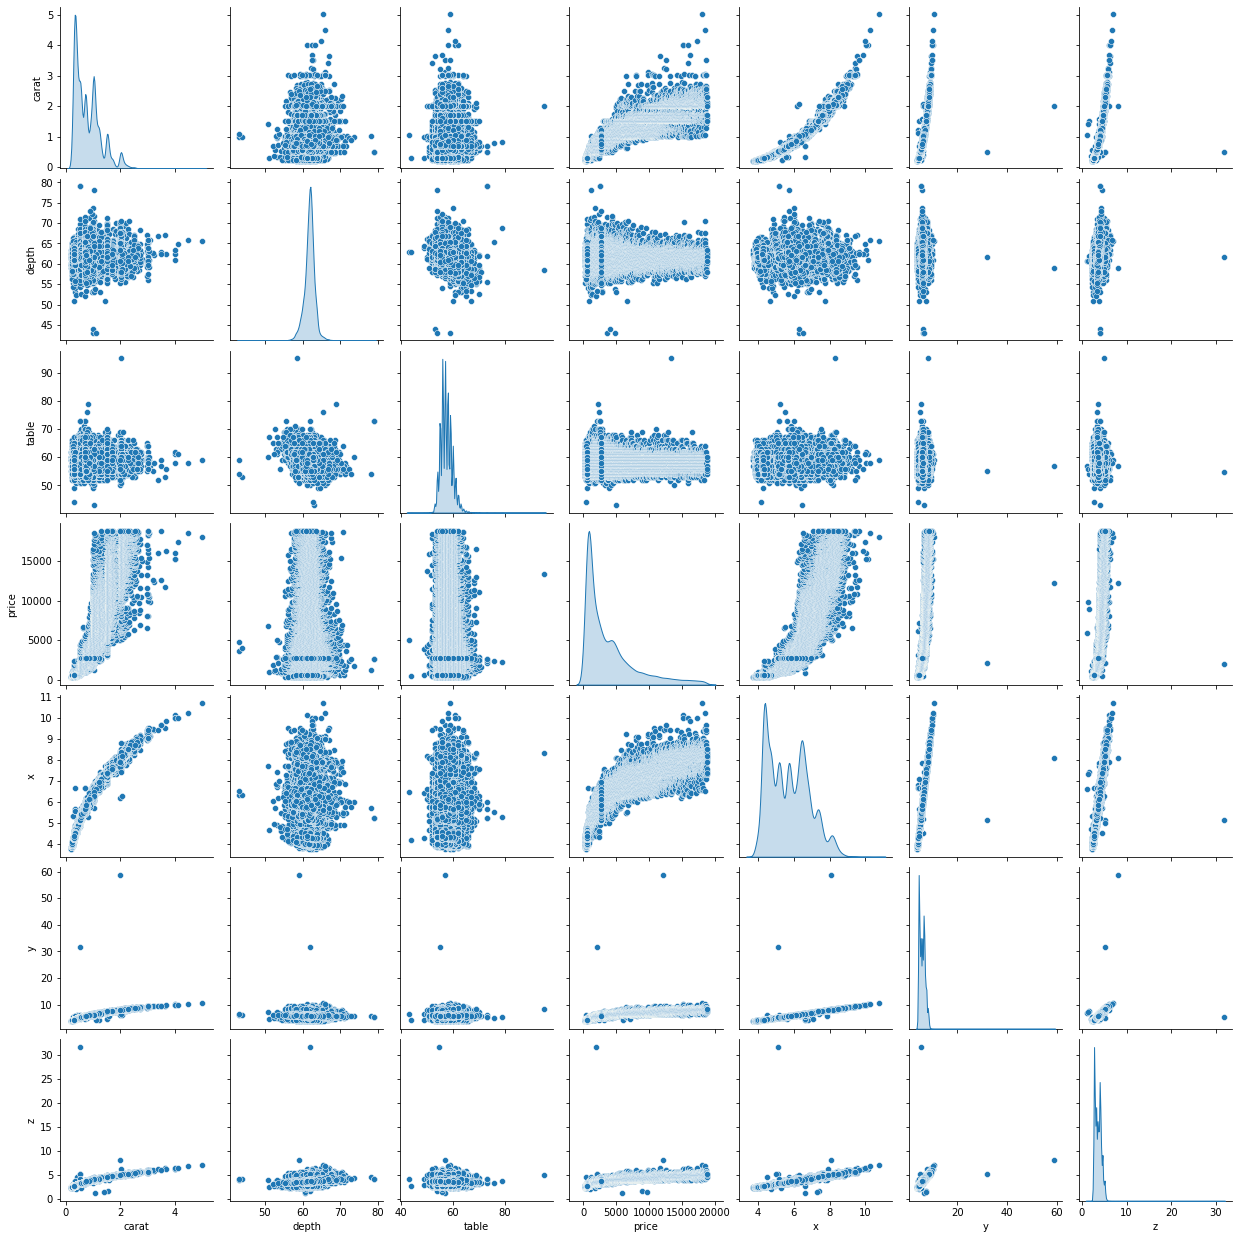

In [11]:
sns.pairplot(data , diag_kind = 'kde')

1. Observed that x,y&z variables has good correlation with respect to the dependent variable (target) price and 
    let’s quantify that correlation by using .corr() & visualize the same using sns.heatmap() method

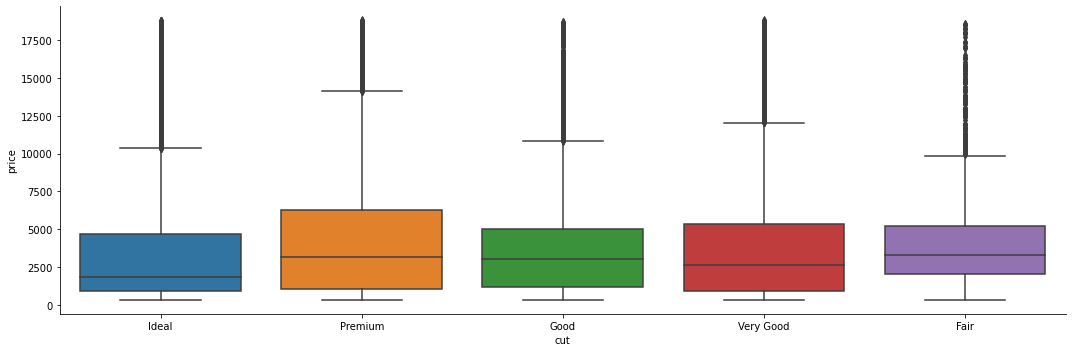

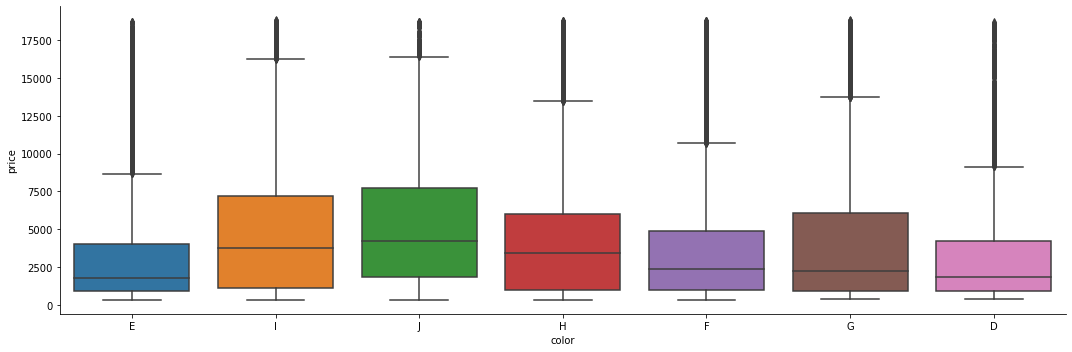

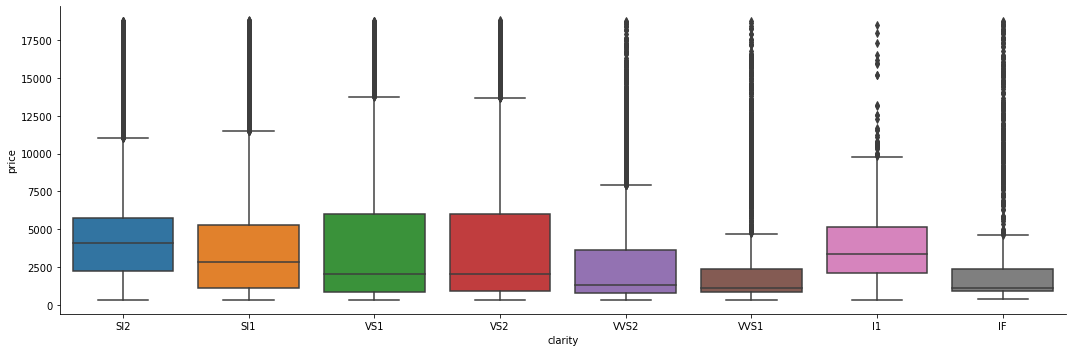

In [12]:
input_cat_columns = data.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=data);
    

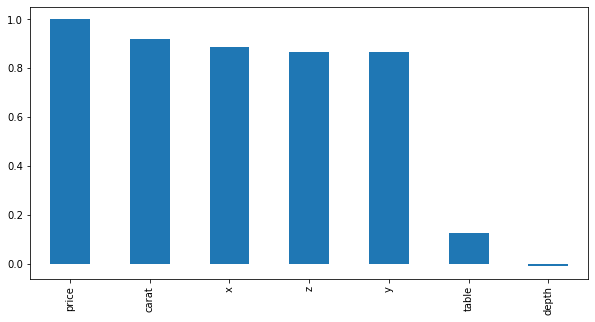

In [13]:
corr_mat = data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

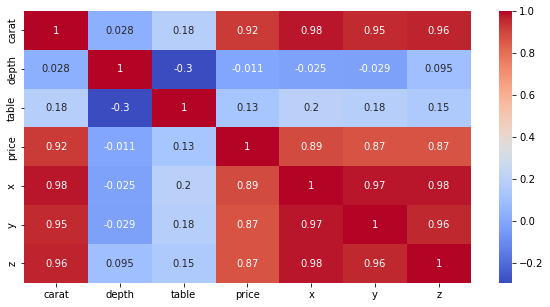

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

1. We can conclude that carat,x,y & z features have strong correlation w.r.t price variable and depth has a 
very weak relation w.r.t price variable. Hence, we can drop the depth feature from the final list of input features to the model.

Let’s have a sense of categorical features with respect to target (price) variable by using box plots

In [15]:
#### From the heat map we can observe that carat, x, y, z have a strong correlation with the price of diamond
#### Therefore we will use these variables along with cut, color and clarity

In [16]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
data['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [18]:
data['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

In [19]:
data['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

In [20]:
data1 = data

#### Label Encoding the cut, color and clarity

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data1['cut']= label_encoder.fit_transform(data1['cut']) 
data1['color']= label_encoder.fit_transform(data1['color']) 
data1['clarity']= label_encoder.fit_transform(data1['clarity']) 


In [22]:
data1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [23]:
data1['cut'].value_counts()

# Ideal        21548   2
# Premium      13780   3
# Very Good    12081   4
# Good         4902    1
# Fair         1609    0

2    21548
3    13780
4    12081
1     4902
0     1609
Name: cut, dtype: int64

In [24]:
data1['color'].value_counts()

# G 11284 3
# E 9797  1
# F 9538  2
# H 8298  4
# D 6774  0
# I 5421  5
# J 2808  6

3    11284
1     9797
2     9538
4     8298
0     6774
5     5421
6     2808
Name: color, dtype: int64

In [25]:
data1['clarity'].value_counts()

# SI1     13063 2
# VS2     12254 5
# SI2      9185 3
# VS1      8170 4
# VVS2     5066 7
# VVS1     3654 6
# IF       1790 1
# I1        738 0

2    13063
5    12254
3     9185
4     8170
7     5066
6     3654
1     1790
0      738
Name: clarity, dtype: int64

#### Defining Inputs and outputs to the model

In [26]:
#depth	table

In [27]:
# we will drop depth and table column as they are very weekly correlated with the target price
data1 = data1.drop(['depth', 'table'], axis = 1)

In [28]:
data1

,carat,cut,color,clarity,price,x,y,z
0,0.23,2,1,3,326,3.95,3.98,2.43
1,0.21,3,1,2,326,3.89,3.84,2.31
2,0.23,1,1,4,327,4.05,4.07,2.31
3,0.29,3,5,5,334,4.20,4.23,2.63
4,0.31,1,6,3,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,2757,5.75,5.76,3.50
53936,0.72,1,0,2,2757,5.69,5.75,3.61
53937,0.70,4,0,2,2757,5.66,5.68,3.56
53938,0.86,3,4,3,2757,6.15,6.12,3.74


In [29]:
# defining input and output for the model

inputs = data1.drop(['price'], axis = 1)
outputs = data1['price']
print('the shape of the data is', data1.shape)
print('the shape of inputs is', inputs.shape)
print('the shape of outputs is', outputs.shape)

the shape of the data is (53920, 8)
the shape of inputs is (53920, 7)
the shape of outputs is (53920,)


#### Dividing the data set into training and test sets

In [30]:
# dividing the data set into trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.30, random_state=1)

# checking the shape of training and test data set
print('The shape of X_train', X_train.shape)
print('The shape of X_test' , X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test' , y_test.shape)

The shape of X_train (37744, 7)
The shape of X_test (16176, 7)
The shape of y_train (37744,)
The shape of y_test (16176,)


#### Traing the model

In [31]:
# # we train the model by giving x train and y train.
# # we train model using the training data set
# from sklearn.linear_model import LinearRegression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# # Ridge Regression
# from sklearn.linear_model import Ridge
# reg_ridge = Ridge()
# reg_ridge.fit(X_train, y_train)

# # Lasso Regression
# from sklearn.linear_model import Lasso
# reg_lasso = Lasso()
# reg_lasso.fit(X_train, y_train)

# # Decision Tree Regressor
# from sklearn.tree import DecisionTreeRegressor
# reg_dt = DecisionTreeRegressor()
# reg_dt.fit(X_train, y_train)

# # Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor
# reg_rfg = RandomForestRegressor()
# reg_rfg.fit(X_train, y_train)

# # KNN Regressor
# from sklearn.neighbors import KNeighborsRegressor
# reg_knn = KNeighborsRegressor()
# reg_knn.fit(X_train, y_train)

# # SVM
# from sklearn.svm import SVR
# reg_svr = SVR()
# reg_svr.fit(X_train, y_train)

#### Predicting model output on test data

In [32]:
# # we use X_test ie test data set to do prediction after training the model on x train and y train data
# # we store prediction in y_pred variable
# y_pred_linear = lin_reg.predict(X_test)

# # Predicting with Ridge Regression
# y_pred_ridge = reg_ridge.predict(X_test)

# # Predicting with Lasso Regression
# y_pred_lasso = reg_lasso.predict(X_test)

# # Predicting the Decision Tree Regressor
# y_pred_dt = reg_dt.predict(X_test)

# # Predicting with Random Forest Regressor
# y_pred_rfg = reg_rfg.predict(X_test)

# # Prediction using KNN Regressor
# y_pred_knn = reg_knn.predict(X_test)

# # Prediction using SVR
# y_pred_svr = reg_svr.predict(X_test)

#### Model Evaluation using R2 score

In [33]:
# # linear Regression Evaluation
# from sklearn.metrics import r2_score
# TS_r2_score_linear = r2_score(y_test, y_pred_linear)
# print('The r2_score for linear regression is:',TS_r2_score_linear)

# # Ridge Regression Evaluation
# from sklearn.metrics import r2_score
# TS_r2_score_ridge = r2_score(y_test, y_pred_ridge)
# print('The r2_score for ridge regression is:',TS_r2_score_ridge)

# # Lasso Regression Evaluation
# from sklearn.metrics import r2_score
# TS_r2_score_lasso = r2_score(y_test, y_pred_lasso)
# print('The r2_score for lasso regression is:',TS_r2_score_lasso)

# # Decision Tree Regression Evaluation
# from sklearn.metrics import r2_score
# TS_r2_score_dt = r2_score(y_test, y_pred_dt)
# print('The r2_score for decision tree regression is:',TS_r2_score_dt)

# # Random Forest Regression Evaluation
# from sklearn.metrics import r2_score
# TS_r2_score_rfg = r2_score(y_test, y_pred_rfg)
# print('The r2_score error for random forest regression is:',TS_r2_score_rfg)

# # KNN Regression Evaluation
# from sklearn.metrics import r2_score
# TS_r2_score_knn = r2_score(y_test, y_pred_knn)
# print('The r2_score for knn regression is:',TS_r2_score_knn)

# # SVM Regression Evaluation
# from sklearn.metrics import r2_score
# TS_r2_score_svr = r2_score(y_test, y_pred_svr)
# print('The r2_score for svr regression is:', TS_r2_score_svr)

In [58]:
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor()
xgboost_regressor.fit(X_train, y_train)

# Prediction using XGB
y_pred_xgb = xgboost_regressor.predict(X_test)

# XGBoost Regression Evaluation
from sklearn.metrics import r2_score
TS_r2_score_xgb = r2_score(y_test, y_pred_xgb)
print('The r2_score for svr regression is:', TS_r2_score_xgb)

The r2_score for svr regression is: 0.9815384262275494


#### We will use Random Forest Regressor for the final model as its r2 score is highest.

In [59]:
import pickle

In [61]:
# open the file where you want to save the data
pickle_out = open('xgboost_regressor.pkl', 'wb')
# dump information to that file
pickle.dump(xgboost_regressor, pickle_out )
pickle_out.close()

In [55]:
# carat	cut	color	clarity	x	y	z
sample = np.array([0.33, 2, 3, 6, 6.48, 3.96, 2.76])

In [66]:
xgb_reg.predict(sample)

array([1525.5103], dtype=float32)

In [62]:
# loading the saved model
load_model = pickle.load(open('xgboost_regressor.pkl', 'rb'))

In [67]:
print(load_model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [81]:
# carat	cut	color	clarity	x	y	z
sam = np.array([[0.30, 0, 5, 4, 2.50, 3.90, 20.00]])

In [82]:
sam.shape

(1, 7)

In [83]:
sam

array([[ 0.3,  0. ,  5. ,  4. ,  2.5,  3.9, 20. ]])

In [86]:
a = load_model.predict(sam)

In [87]:
a

array([786.4112], dtype=float32)

In [88]:
a[0]

786.4112

In [95]:
i = 1000
print('the price is {}'. format(i))

the price is 1000
